<a href="https://colab.research.google.com/github/Ghisbe/Desafio_alura_TelecomX/blob/main/Desafio_telecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Desafio Telecom X**

Contexto: la empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

El desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa.

In [1]:
import pandas as pd


##**Extracción de datos**


In [2]:
url = '/content/drive/MyDrive/ONE - PYTHON/ETL/Desafio_telecom/TelecomX_Data.json'

In [3]:
df= pd.read_json(url)
df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


###Normalizar datos

In [4]:
cols_to_normalize = ['customer', 'phone', 'internet', 'account']


In [5]:
for col in cols_to_normalize:
    #se crea un nuevo dataframe normalizado de la columna actual
    temp_df = pd.json_normalize(df[col])
    #se concatena el nuevo dataframe y eliminamos la columna original anidada
    df = pd.concat([df.drop(columns=[col]), temp_df], axis=1)

In [6]:
#para ver todas las columnas
pd.set_option('display.max_columns', None)

df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


##**Transformación**

Se genera una copia del dataset para realizar las transformaciones sin perder los datos originales.

In [7]:
df_copy = df.copy()

Vemos la infomación del dataset para observar los tipos de datos y si hay datos nulos.

In [8]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


Con esta observación, cambiamos el tipo de dato de la columna 'Charges.Total' a float64. Pero primero verificamos si hay espacios en blanco.

In [9]:
espacios_en_blanco = df_copy['Charges.Total'].str.contains(r'^\s*$', na=False).sum()
print(f"Cantidad de filas con solo espacios en blanco: {espacios_en_blanco}")

Cantidad de filas con solo espacios en blanco: 11


In [10]:
#filtramos las filas donde 'Charges.Total' tiene solo espacios
filas_sin_datos = df_copy[df_copy['Charges.Total'].str.contains(r'^\s*$', na=False)]
filas_sin_datos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


Aqui podemos observar las filas que contienen espacios en blanco de la columna 'Charges.Total', pero vamos a verificar si hay otras columnas con espacios en blanco.

In [11]:
#se cuentan las celdas que solo tienen espacios en blanco en todo el DataFrame
for columna in df_copy.columns:
    if df_copy[columna].dtype == 'object':
        cant_espacios = df_copy[columna].str.contains(r'^\s*$', na=False).sum()
        if cant_espacios > 0:
            print(f"Columna '{columna}': {cant_espacios} espacios en blanco.")

Columna 'Churn': 224 espacios en blanco.
Columna 'Charges.Total': 11 espacios en blanco.


Se procedió a eliminar las 224 filas sin información en la columna 'churn', ya que este dato no puede ser estimado ni recuperado. Tras esta limpieza, se validará si existen 11 o menos espacios en blanco en la columna 'Charges.Total'.

In [12]:
import numpy as np

In [13]:
#se convierten los espacios en blanco de 'Churn' a valores NaN
df_copy['Churn'] = df_copy['Churn'].replace(r'^\s*$', np.nan, regex=True)

#se eliminan las filas donde 'Churn' sea NaN
df_copy.dropna(subset=['Churn'], inplace=True)

#se verifican cuántas filas quedaron
print(f"Filas eliminadas: 224")
print(f"Filas restantes en df_copy: {len(df_copy)}")

Filas eliminadas: 224
Filas restantes en df_copy: 7043


In [14]:
#se verifica si la eliminación se hizo de forma correcta
print("Espacios restantes:", df_copy['Churn'].str.contains(r'^\s*$', na=False).sum())
print("Nulos restantes:", df_copy['Churn'].isna().sum())

Espacios restantes: 0
Nulos restantes: 0


In [15]:
#se filtra nuevamente las filas donde 'Charges.Total' tiene solo espacios
filas_sin_datos_dos = df_copy[df_copy['Charges.Total'].str.contains(r'^\s*$', na=False)]
filas_sin_datos_dos

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
2308,3213-VVOLG,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
2930,4075-WKNIU,No,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,
3134,4367-NUYAO,No,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,
3203,4472-LVYGI,No,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
4169,5709-LVOEQ,No,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,


In [16]:
espacios_en_blanco_dos = df_copy['Charges.Total'].str.contains(r'^\s*$', na=False).sum()

print(f"Cantidad de filas con solo espacios en blanco: {espacios_en_blanco_dos}")

Cantidad de filas con solo espacios en blanco: 11


Debido a que la antigüedad ('tenure') es cero, los cargos totales se consideran inexistentes. Se sustituirán los espacios vacíos en 'Charges.Total' por cero para reflejar esta condición de clientes nuevos.

In [17]:
#se asegura que la columna sea numérica
df_copy['Charges.Total'] = pd.to_numeric(df_copy['Charges.Total'], errors='coerce')

#se rellenan los valores NaN con 0
df_copy['Charges.Total'] = df_copy['Charges.Total'].fillna(0)

#se verifica que ya no existan nulos y que el tipo sea float64
print(f"Nulos en Charges.Total: {df_copy['Charges.Total'].isna().sum()}")
print(f"Tipo de dato: {df_copy['Charges.Total'].dtype}")

Nulos en Charges.Total: 0
Tipo de dato: float64


Ahora verificaremos los valores de las demás columnas, para observar y realizar cambios, si estos son necesarios.

In [18]:
#se itera por las columnas que no son numéricas
for col in df_copy.select_dtypes(include=['object']).columns:
    print(f"Columna: {col}")
    print(df_copy[col].unique())
    print("-" * 30)

Columna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
------------------------------
Columna: Churn
['No' 'Yes']
------------------------------
Columna: gender
['Female' 'Male']
------------------------------
Columna: Partner
['Yes' 'No']
------------------------------
Columna: Dependents
['Yes' 'No']
------------------------------
Columna: PhoneService
['Yes' 'No']
------------------------------
Columna: MultipleLines
['No' 'Yes' 'No phone service']
------------------------------
Columna: InternetService
['DSL' 'Fiber optic' 'No']
------------------------------
Columna: OnlineSecurity
['No' 'Yes' 'No internet service']
------------------------------
Columna: OnlineBackup
['Yes' 'No' 'No internet service']
------------------------------
Columna: DeviceProtection
['No' 'Yes' 'No internet service']
------------------------------
Columna: TechSupport
['Yes' 'No' 'No internet service']
------------------------------
Columna: StreamingTV
['

Se realiza el cambio de la columna 'churn' a valor entero y se realiza el proceso de estandarización de las otras columnas.

In [19]:
df_copy['SeniorCitizen'] = df_copy['SeniorCitizen'].astype(int)

Ahora modificamos las demás columnas

In [20]:
#se realiza una lista de todas las columnas que se decide estandarizar
cols_a_estandarizar = [
    'Churn','Partner', 'Dependents', 'PhoneService', 'PaperlessBilling',
    'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

#se unifican los valores "No servicio" a "No" (Estandarización)
df_copy[cols_a_estandarizar] = df_copy[cols_a_estandarizar].replace(['No internet service', 'No phone service'], 'No')

#se transforman a binarios (1 y 0)
#se usa .map para asegurar que solo Yes sea 1 y No sea 0
df_copy[cols_a_estandarizar] = df_copy[cols_a_estandarizar].replace({'Yes': 1, 'No': 0})

#convertimos el tipo de dato a entero
df_copy[cols_a_estandarizar] = df_copy[cols_a_estandarizar].astype(int)

print(df_copy[cols_a_estandarizar].dtypes)
df_copy[cols_a_estandarizar].sample(5)

Churn               int64
Partner             int64
Dependents          int64
PhoneService        int64
PaperlessBilling    int64
MultipleLines       int64
OnlineSecurity      int64
OnlineBackup        int64
DeviceProtection    int64
TechSupport         int64
StreamingTV         int64
StreamingMovies     int64
dtype: object


/tmp/ipython-input-1773090328.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_copy[cols_a_estandarizar] = df_copy[cols_a_estandarizar].replace({'Yes': 1, 'No': 0})


,Churn,Partner,Dependents,PhoneService,PaperlessBilling,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
4292,0,0,0,1,1,0,0,1,0,0,1,1
6437,0,1,0,0,1,0,0,1,1,1,1,1
3299,0,0,0,0,1,0,1,1,1,1,1,0
2620,0,1,1,1,1,0,0,0,0,0,0,0
5472,0,1,1,1,1,1,0,0,0,0,0,0


Asi quedó el dataset con las tranformaciones correspondientes

In [21]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   int64  
 5   Dependents        7043 non-null   int64  
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   int64  
 8   MultipleLines     7043 non-null   int64  
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   int64  
 11  OnlineBackup      7043 non-null   int64  
 12  DeviceProtection  7043 non-null   int64  
 13  TechSupport       7043 non-null   int64  
 14  StreamingTV       7043 non-null   int64  
 15  StreamingMovies   7043 non-null   int64  
 16  Contract          7043 non-null   object 
 17  

Agregamos a continuación la columna 'cuentas diarias' como parte de la actividad extra.

In [22]:
#se crea la columna 'Cuentas_Diarias' dividiendo el cargo mensual por 30
df_copy['Cuentas_Diarias'] = df_copy['Charges.Monthly'] / 30

#se edondea a 2 decimales para que sea más legible
df_copy['Cuentas_Diarias'] = df_copy['Cuentas_Diarias'].round(2)

df_copy[['Charges.Monthly', 'Cuentas_Diarias']].sample(10)

,Charges.Monthly,Cuentas_Diarias
3229,69.80,2.33
6357,78.95,2.63
6262,94.25,3.14
1651,24.15,0.80
593,85.45,2.85
5403,89.45,2.98
4956,25.25,0.84
269,105.00,3.50
6147,82.95,2.76
1486,45.65,1.52


In [23]:
df_copy.sample(7)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
1402,2026-TGDHM,1,Female,0,0,0,7,1,0,Fiber optic,0,0,0,0,0,1,Month-to-month,1,Electronic check,79.30,523.15,2.64
2386,3329-WDIOK,1,Female,0,0,0,3,0,0,DSL,0,1,0,0,1,1,Month-to-month,1,Electronic check,50.60,155.35,1.69
3982,5445-PZWGX,1,Male,0,0,0,62,1,1,Fiber optic,1,1,0,1,0,1,One year,0,Electronic check,102.00,6529.25,3.40
2387,3331-HQDTW,1,Female,0,0,0,34,1,1,Fiber optic,1,1,1,0,1,1,Month-to-month,1,Mailed check,109.80,3587.25,3.66
5012,6856-RAURS,0,Female,0,0,0,2,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Mailed check,74.90,136.05,2.50
6817,9398-MMQTO,0,Male,0,0,0,3,1,0,Fiber optic,0,1,0,0,0,0,Month-to-month,0,Credit card (automatic),74.45,221.10,2.48
1577,2243-FNMMI,0,Male,0,0,0,20,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,19.40,415.40,0.65


##**Carga y análisis**

###Análisis descriptivo:

In [24]:
df_copy.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.158675
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,1.003088
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.180000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.340000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.990000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.960000


Selecciono sólo estas columnas: 'tenure', 'Charges.Monthly', 'Charges.Total', 'Charges.Daily', para observar mejor las estadísticas en estas columnas claves.

In [25]:
columnas = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']
resumen_cargos = df_copy[columnas].describe()
print(resumen_cargos)

            tenure  Charges.Monthly  Charges.Total  Cuentas_Diarias
count  7043.000000      7043.000000    7043.000000      7043.000000
mean     32.371149        64.761692    2279.734304         2.158675
std      24.559481        30.090047    2266.794470         1.003088
min       0.000000        18.250000       0.000000         0.610000
25%       9.000000        35.500000     398.550000         1.180000
50%      29.000000        70.350000    1394.550000         2.340000
75%      55.000000        89.850000    3786.600000         2.990000
max      72.000000       118.750000    8684.800000         3.960000


Cálculo de mediana y moda:

In [26]:
columnas_otros_calculos = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias']

#mediana
mediana = df_copy[columnas_otros_calculos].median()

#moda
moda = df_copy[columnas_otros_calculos].mode().iloc[0]

print("Mediana:\n", mediana)
print("\nModa:\n", moda)

Mediana:
 tenure               29.00
Charges.Monthly      70.35
Charges.Total      1394.55
Cuentas_Diarias       2.34
dtype: float64

Moda:
 tenure              1.00
Charges.Monthly    20.05
Charges.Total       0.00
Cuentas_Diarias     0.66
Name: 0, dtype: float64


Se calculan los valores únicos de cada columna para observar el comportamiento del cliente:

In [27]:
columnas_texto = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

#valores únicos
valores_unicos = df_copy[columnas_texto].nunique()

#valor más frecuente para cada categoría
moda_texto = df_copy[columnas_texto].mode().iloc[0]

resumen_categorias = pd.DataFrame({
    'Valores Únicos': valores_unicos,
    'Valor más Frecuente': moda_texto
})

print(resumen_categorias)

                 Valores Únicos Valor más Frecuente
gender                        2                Male
InternetService               3         Fiber optic
Contract                      3      Month-to-month
PaymentMethod                 4    Electronic check


In [28]:
columnas_texto = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

for col in columnas_texto:
    frecuencia = df_copy[col].value_counts().iloc[0]
    valor = df_copy[col].mode()[0]
    print(f"En {col}, el valor '{valor}' aparece {frecuencia} veces.")

En gender, el valor 'Male' aparece 3555 veces.
En InternetService, el valor 'Fiber optic' aparece 3096 veces.
En Contract, el valor 'Month-to-month' aparece 3875 veces.
En PaymentMethod, el valor 'Electronic check' aparece 2365 veces.


##Distribución de cancelaciones:

El objetivo es comprender cómo está distribuida la variable "churn" (evasión) entre los clientes.

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

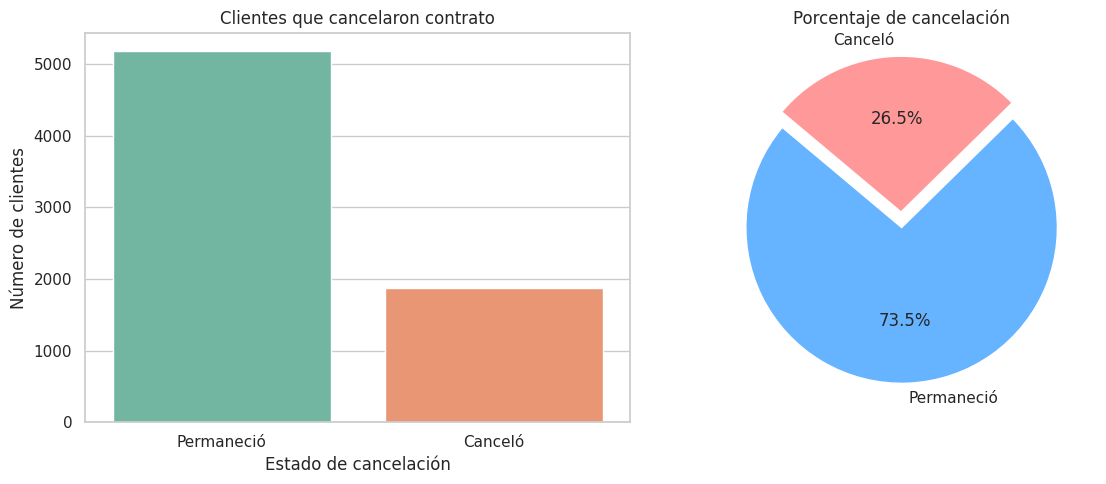

In [30]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 5))

#gráfico de barras
plt.subplot(1, 2, 1)

ax = sns.countplot(data=df_copy, x='Churn', hue='Churn', palette='Set2', legend=False)
ax.set_xticks([0, 1])
ax.set_xticklabels(['Permaneció', 'Canceló'])

plt.title('Clientes que cancelaron contrato')
plt.xlabel('Estado de cancelación')
plt.ylabel('Número de clientes')

#gráfico circular
plt.subplot(1, 2, 2)

df_copy['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=140,
    colors=['#66b3ff','#ff9999'],
    explode=(0, 0.1),
    labels=['Permaneció', 'Canceló']
)
plt.title('Porcentaje de cancelación')
plt.ylabel('')

plt.tight_layout()
plt.show()

Recuento de cancelaciones por variables categóricas

Exploraremos cómo se distribuye las cancelaciones según variables categóricas, como género, tipo de contrato, método de pago, entre otras.

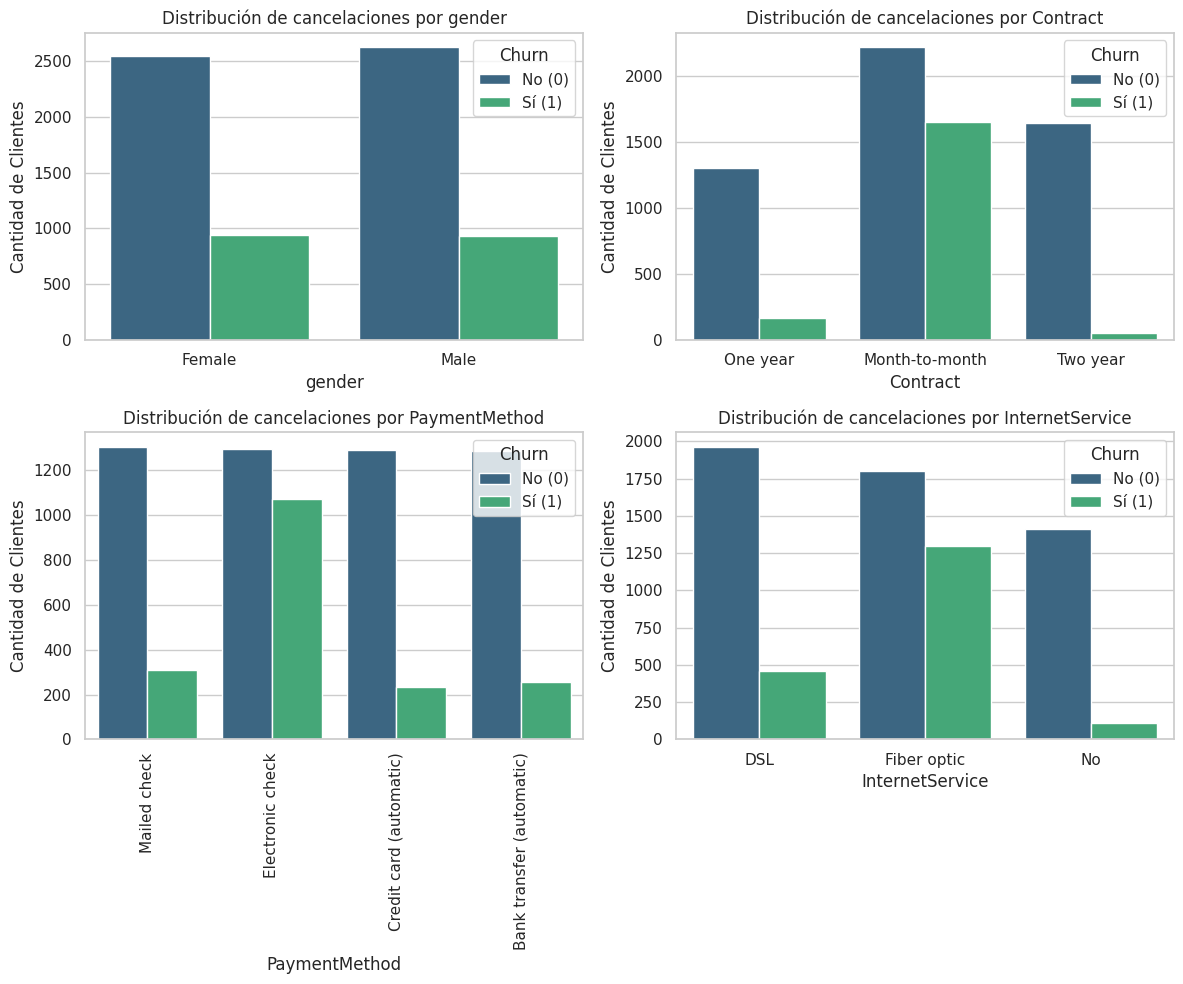

In [31]:
variables_categoricas = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

plt.figure(figsize=(12,10))
plt.subplots_adjust(hspace=0.4)

for i, col in enumerate(variables_categoricas):
    plt.subplot(2, 2, i + 1)

    #se crea el gráfico comparando Churn (0 y 1) por cada categoría
    ax = sns.countplot(data=df_copy, x=col, hue='Churn', palette='viridis')

    plt.title(f'Distribución de cancelaciones por {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad de Clientes')
    plt.legend(title='Churn', labels=['No (0)', 'Sí (1)'])

    if col == 'PaymentMethod':
        plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Conteo de cancelaciones por variables numéricas

Exploraremos cómo las variables numéricas, como "total gastado" o "tiempo de contrato", se distribuyen entre los clientes que cancelaron y los que no cancelaron.

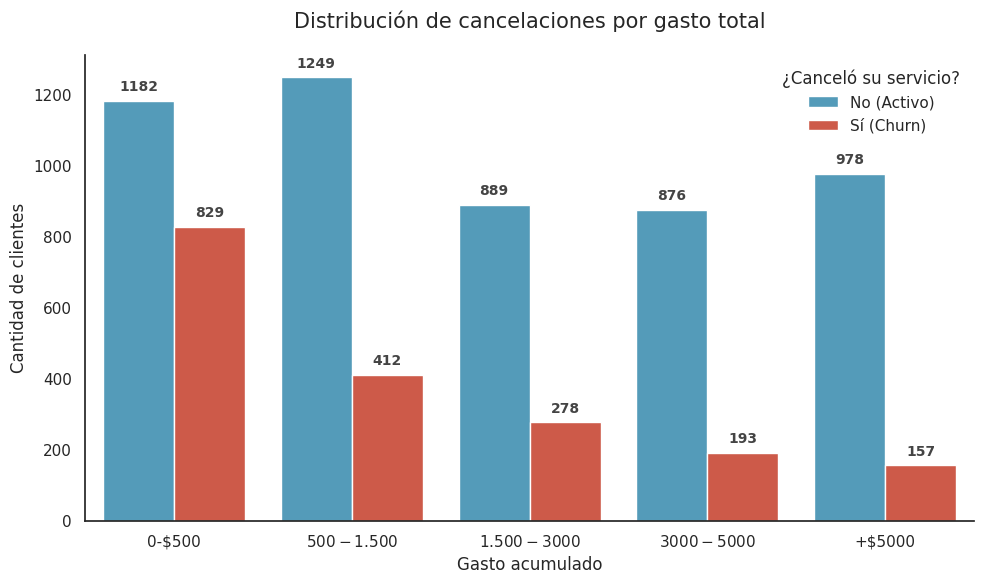

In [32]:
plt.figure(figsize=(10, 6))
sns.set_style("white")

bins = [0, 500, 1500, 3000, 5000, df_copy['Charges.Total'].max()]
labels = ['0-$500', '$500-$1.500', '$1.500-$3000', '$3000-$5000', '+$5000']

ax = sns.countplot(
    x=pd.cut(df_copy['Charges.Total'], bins=bins, labels=labels, include_lowest=True),
    hue=df_copy['Churn'],
    palette=['#43a2ca', '#e34a33'] # Azul para activos, Rojo-Naranja para Churn
)

plt.title('Distribución de cancelaciones por gasto total', fontsize=15, pad=20)
plt.xlabel('Gasto acumulado', fontsize=12)
plt.ylabel('Cantidad de clientes', fontsize=12)
plt.legend(title='¿Canceló su servicio?', labels=['No (Activo)', 'Sí (Churn)'], frameon=False)

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.annotate(f'{int(height)}',
                    (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center',
                    xytext=(0, 10),
                    textcoords='offset points',
                    fontsize=10, fontweight='bold', color='#444444')

sns.despine()
plt.tight_layout()
plt.show()

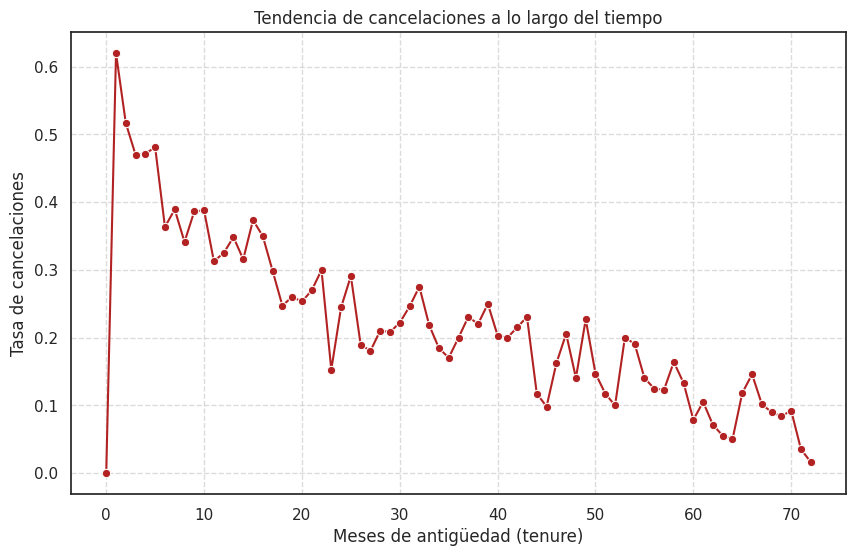

In [33]:
plt.figure(figsize=(10, 6))

df_linea = df_copy.groupby('tenure')['Churn'].mean().reset_index()

sns.lineplot(data=df_linea, x='tenure', y='Churn', marker='o', color='firebrick')

plt.title('Tendencia de cancelaciones a lo largo del tiempo')
plt.xlabel('Meses de antigüedad (tenure)')
plt.ylabel('Tasa de cancelaciones')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

##**Informe final**

###Introducción:

Objetivo del análisis:

El objetivo de este análisis es comprender los factores que influyen en la cancelacion de servicios por parte de clientes en la empresa.
Esto representa una problemática crítica para el negocio, ya que implica la pérdida de ingresos recurrentes y mayores costos de adquisición de nuevos clientes.

A través del análisis exploratorio de datos, se busca identificar patrones de comportamiento asociados a los clientes que cancelan el servicio, considerando variables demográficas, contractuales, de consumo y facturación.

###Limpieza y tratamiento de datos:

En esta etapa se realizó un proceso completo de extracción, limpieza, transformación y estandarización del dataset.

* **Extracción y normalización:**

Los datos fueron importados desde un archivo JSON.

Se normalizaron columnas anidadas (customer, phone, internet, account) utilizando pd.json_normalize.

Se obtuvo un dataset plano con 21 columnas y más de 7.000 registros.

* **Tratamiento de valores faltantes:**

Se detectaron:

224 registros con valores vacíos en la variable Churn, los cuales fueron eliminados por tratarse de la variable objetivo.

11 registros con valores vacíos en Charges.Total, asociados a clientes con tenure = 0.

En estos últimos casos, se imputó el valor 0, ya que no habían generado cargos.
* **Transformaciones y estandarización:**

Conversión de Charges.Total a tipo numérico (float64).

Transformación de variables categóricas binarias (Yes/No) a valores 0 y 1.

Unificación de categorías como “No internet service” y “No phone service” en No.

Creación de la variable Cuentas_Diarias, calculada a partir del cargo mensual.


###Análisis exploratorio de datos:

- **Distribución de las cancelaciones:**

El análisis inicial muestra que aproximadamente 26,5% (como se observa en el grafico circular) de los clientes han cancelado el servicio, lo que confirma la relevancia del problema.

✔️ Insight clave:
La cancelacion representa más de 1 de cada 4 clientes, un valor elevado para un servicio de suscripción.

- **Cancelaciones según variables categóricas**

Se analizó las cancelaciones en función de variables como: Género, tipo de contrato, método de pago y tipo de servicio de internet.

Hallazgos principales:

Los clientes con contrato Month-to-month presentan una tasa de evasión significativamente mayor.

El método de pago Electronic check está fuertemente asociado al churn.

Los clientes con Fiber optic muestran mayor proporción de cancelaciones en comparación con DSL.

No se observan diferencias relevantes por género.

✔️ Insight clave:
Las condiciones contractuales y de pago tienen mayor impacto en la cancelación que las variables demográficas.

- **Cancelaciones y variables numéricas:**

Los clientes con menor antigüedad presentan mayor tasa de churn.

Las cancelaciones disminuyen progresivamente a medida que aumenta el tiempo de permanencia, como se puede observar en el siguiente gráfico:

<Axes: xlabel='tenure', ylabel='Churn'>

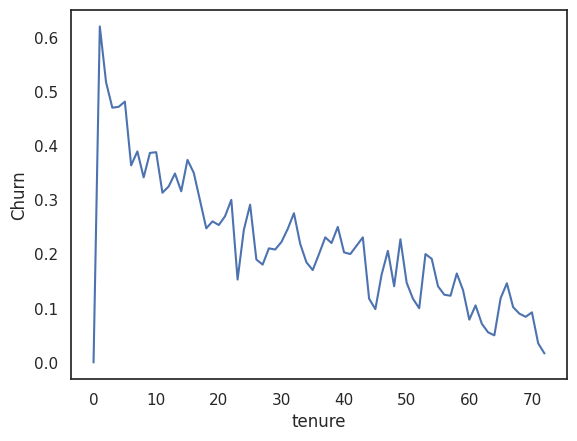

In [34]:
df_linea = df_copy.groupby('tenure')['Churn'].mean().reset_index()

sns.lineplot(data=df_linea, x='tenure', y='Churn')


✔️ Insight clave:
Los primeros meses son críticos para la retención.

- **Gasto total acumulado:**

Los clientes con menor gasto total presentan mayores cancelaciones.

A partir de mayores niveles de gasto, la proporción de churn disminuye.

✔️ Insight clave:
Los clientes con menor vinculación económica con la empresa son más propensos a cancelar.

###Conclusiones e Insights:

A partir del análisis exploratorio se identificaron los siguientes puntos clave:

- Las cancelaciones afectan a más de una cuarta parte de la base de clientes.

- Los clientes con contratos mensuales son los más propensos a cancelar.

- La cancelación es más frecuente en clientes con: baja antigüedad, menor gasto acumulado, método de pago electronic check, servicio de internet por fibra óptica

Estos patrones permiten identificar perfiles de alto riesgo de cancelación y priorizar acciones de retención.

###Recomendaciones:

Basándose en los insights obtenidos, se sugieren las siguientes acciones:

- Incentivar contratos de largo plazo: ofrecer descuentos o beneficios por migrar de contratos mensuales a anuales.

- Programas de retención temprana: implementar acciones específicas durante los primeros meses del cliente (onboarding, seguimiento).

- Revisión de métodos de pago: incentivar métodos automáticos (tarjeta o débito) para reducir churn.

- Mejora del servicio de fibra óptica: analizar posibles problemas de calidad o expectativas no cumplidas en este segmento.